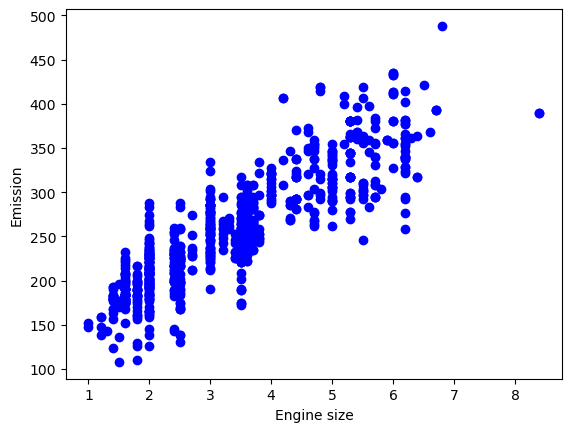

Coefficients:  [[39.38105842]]
Intercept:  [124.47810327]
Mean absolute error: 22.14
Residual sum of squares (MSE): 824.45
R2-score: 0.7376382668985402


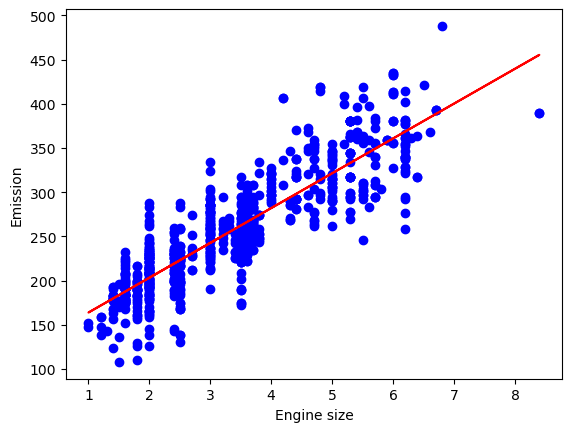

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
# import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score


df = pd.read_csv("FuelConsumptionCo2.csv")
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)
m = r2_score(test_y_hat , test_y)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score:", m )
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()